In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Conv1D,LSTM
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [2]:
#importing dataset
movie_reviews = pd.read_csv("IMDB Dataset.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

In [3]:
#top 5 data
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

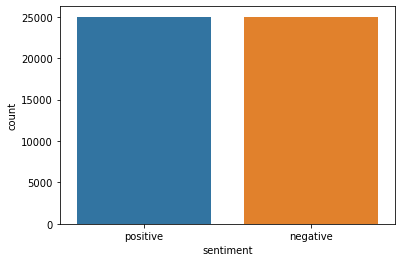

In [4]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

In [5]:
movie_reviews['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
#As there are many tags availabe, will remove that first

In [7]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

#This code replaces anything which is enclosed withon <---> with spaces.
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

In [8]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [9]:
X[0]

'One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare Forget pretty picture

In [10]:
# cConvert target label in numbers 1 or 0
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [11]:
# 30% testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [12]:
#Preparing the Embedding Layer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [13]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [22]:
vocab_size

87244

In [23]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('../glove.6B/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()


In [24]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [17]:
#Model Creation

In [18]:
#Using Simple Neural Network

In [19]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [20]:
#model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          8724400   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 8,734,401
Trainable params: 10,001
Non-trainable params: 8,724,400
_________________________________________________________________
None


In [21]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
219/219 [==============================] - 1s 6ms/step - loss: 0.6070 - acc: 0.6655 - val_loss: 0.5514 - val_acc: 0.7197
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.5057 - acc: 0.7523 - val_loss: 0.5151 - val_acc: 0.7490
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4583 - acc: 0.7865 - val_loss: 0.5146 - val_acc: 0.7481
Epoch 4/10
219/219 [==============================] - 1s 5ms/step - loss: 0.4361 - acc: 0.8004 - val_loss: 0.5169 - val_acc: 0.7447
Epoch 5/10
219/219 [==============================] - 1s 5ms/step - loss: 0.4184 - acc: 0.8097 - val_loss: 0.5281 - val_acc: 0.7427
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.4076 - acc: 0.8156 - val_loss: 0.5268 - val_acc: 0.7443
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.3977 - acc: 0.8199 - val_loss: 0.5337 - val_acc: 0.7413
Epoch 8/10
219/219 [==============================] - 1s 5ms/step - loss: 0.

In [32]:
score = model.evaluate(X_test, y_test, verbose=1)

469/469 [==============================] - 1s 1ms/step - loss: 0.6079 - acc: 0.7258


In [33]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6079491376876831
Test Accuracy: 0.7257999777793884


In [37]:
import matplotlib.pyplot as plt

In [41]:
# Text Classification usinf CNN

In [45]:
#CNN model Creation
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [46]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          8724400   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 8,788,657
Trainable params: 64,257
Non-trainable params: 8,724,400
_________________________________________________________________
None


In [47]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
219/219 [==============================] - 9s 40ms/step - loss: 0.4951 - acc: 0.7585 - val_loss: 0.4080 - val_acc: 0.8151
Epoch 2/6
219/219 [==============================] - 9s 40ms/step - loss: 0.3694 - acc: 0.8390 - val_loss: 0.3682 - val_acc: 0.8353
Epoch 3/6
219/219 [==============================] - 9s 40ms/step - loss: 0.3209 - acc: 0.8637 - val_loss: 0.3510 - val_acc: 0.8414
Epoch 4/6
219/219 [==============================] - 9s 39ms/step - loss: 0.2801 - acc: 0.8889 - val_loss: 0.3453 - val_acc: 0.8427
Epoch 5/6
219/219 [==============================] - 9s 40ms/step - loss: 0.2435 - acc: 0.9098 - val_loss: 0.3331 - val_acc: 0.8534
Epoch 6/6
469/469 [==============================] - 2s 4ms/step - loss: 0.3523 - acc: 0.8438


In [53]:
# Text Classification Using RNN
from keras.layers import Bidirectional

In [58]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(1, activation='softmax'))

#model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [59]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          8724400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               234496    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 9,090,993
Trainable params: 366,593
Non-trainable params: 8,724,400
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
183/219 [========================>.....] - ETA: 48s - loss: 7.6637 - acc: 0.4974 - ETA: 1:07

In [29]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.34672027826309204
Test Accuracy: 0.8464666604995728


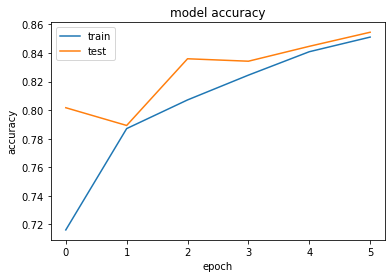

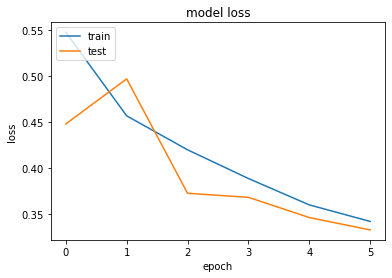

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [47]:
instance = "Digestible only by bhai die hard fans .Exotic locales, super cars, glamorous cast  and whole lot spent on lavish sets bluntly for a movie which has no apt storyline or plot nor fulfils the action part as its totally overdosed and logic less . Direction is pathetic , music is horrible and basic of the basic logic fails like there are scenes which start at a point and the actors are in a particular outfit and the very same seen in few seconds continues in flow but the actors are seen in a different outfit , how on earth is that possible. First half total dead and lifeless only the last 40 mins of the film is watchable .Total disappointment from Bhai this Eid ."
print(instance)

Digestible only by bhai die hard fans .Exotic locales, super cars, glamorous cast  and whole lot spent on lavish sets bluntly for a movie which has no apt storyline or plot nor fulfils the action part as its totally overdosed and logic less . Direction is pathetic , music is horrible and basic of the basic logic fails like there are scenes which start at a point and the actors are in a particular outfit and the very same seen in few seconds continues in flow but the actors are seen in a different outfit , how on earth is that possible. First half total dead and lifeless only the last 40 mins of the film is watchable .Total disappointment from Bhai this Eid .


In [51]:
instance ='Dear Internet User,I saw #Race3 movie last night in PVR Star Mall Gurgaon, at the 10.10pm show. Believe me, Im very much disappointed by the performance of all characters, especially Jacqueline and Salman Khan. I think Salman should think before signing any films because these days his films not performing well. And slowly Salman will lose his shine. When we talk about the storyline, So in one sentence - "No Story at all".Songs were un-understandable. I think after getting the good success of ABCD, Remo think they can do anything. But REMO Sir, its India, anything can happen at any time.Bobby Deol, Daisy Shah, and another guy dont know how to act, and this we all knows. :-)'



instance

'Dear Internet User,I saw #Race3 movie last night in PVR Star Mall Gurgaon, at the 10.10pm show. Believe me, Im very much disappointed by the performance of all characters, especially Jacqueline and Salman Khan. I think Salman should think before signing any films because these days his films not performing well. And slowly Salman will lose his shine. When we talk about the storyline, So in one sentence - "No Story at all".Songs were un-understandable. I think after getting the good success of ABCD, Remo think they can do anything. But REMO Sir, its India, anything can happen at any time.Bobby Deol, Daisy Shah, and another guy dont know how to act, and this we all knows. :-)'

In [52]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.60311407]], dtype=float32)

In [37]:
flat_list

[[3740,
  124,
  2234,
  2931,
  3715,
  144,
  144,
  125,
  431,
  1727,
  4805,
  125,
  144,
  4805,
  124,
  2604,
  125,
  2931,
  125,
  431,
  124,
  124,
  2604,
  753,
  3715,
  2604,
  3715,
  3022,
  125,
  4805,
  125,
  4875,
  3715,
  125,
  4805,
  753,
  431,
  125,
  4805,
  144,
  125,
  4805,
  3715,
  431,
  2931,
  2604,
  124,
  3715,
  3715,
  4805,
  144,
  3715,
  753,
  2604,
  4805,
  3715,
  753,
  124,
  144,
  2234,
  4875,
  125,
  753,
  125,
  1727,
  125,
  3715,
  4805,
  753,
  3715,
  3740,
  124,
  2234,
  124,
  125,
  124,
  3715,
  3715,
  4805,
  124,
  2234,
  2604]]

In [41]:
y[1]

1